In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import os
os.getcwd() 

'/Users/NickGylling1/Documents/University of Washington/Winter 2017/BIOL 419/911 project/911_new'

In [23]:
os.listdir()

['.DS_Store',
 '.git',
 '.ipynb_checkpoints',
 '2016 and 2017 911 calls.csv',
 '2016 data.csv',
 'Alexs-Doc-Monday-the-6th.ipynb',
 'Initial Visualization.ipynb',
 'README.md',
 'weather data.csv']

In [24]:
call_data = pd.read_csv('2016 and 2017 911 calls.csv')

call_data

,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Day,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude
0,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,1/1/16 0:00,1/1/16,Q,Q3,7000.5001,-122.358650,47.626724
1,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,1/1/16 0:02,1/1/16,O,O1,9300.3029,-122.334206,47.576653
2,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,1/1/16 0:02,1/1/16,F,F2,11402.2002,-122.357800,47.521950
3,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,1/1/16 0:02,1/1/16,K,K2,9200.2006,-122.332880,47.601300
4,BLOCKING VEHICLE,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,1/1/16 0:05,1/1/16,R,R3,10300.5013,-122.284100,47.556450
5,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,1/1/16 0:08,1/1/16,W,W2,9800.5014,-122.386765,47.569736
6,"ANIMALS - INJURED, DEAD, DANGEROUS",ANIMAL COMPLAINTS,ANIMAL COMPLAINTS,1/1/16 0:09,1/1/16,R,R3,10200.4026,-122.273390,47.551907
7,"HARASSMENT, THREATS","THREATS, HARASSMENT","THREATS, HARASSMENT",1/1/16 0:09,1/1/16,G,G2,8700.2000,-122.303310,47.605120
8,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,1/1/16 0:11,1/1/16,S,S3,11800.2014,-122.258200,47.514280
9,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,1/1/16 0:13,1/1/16,D,D2,7300.2023,-122.333170,47.614820


In [25]:
call_data_2016 = pd.read_csv('2016 data.csv')

call_data_2016

,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Date,Time,Longitude,Latitude
0,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,1/1/16 0:00,1/1/16,0:00,-122.358650,47.626724
1,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,1/1/16 0:02,1/1/16,0:02,-122.334206,47.576653
2,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,1/1/16 0:02,1/1/16,0:02,-122.332880,47.601300
3,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,1/1/16 0:02,1/1/16,0:02,-122.357800,47.521950
4,BLOCKING VEHICLE,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,1/1/16 0:05,1/1/16,0:05,-122.284100,47.556450
5,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,1/1/16 0:08,1/1/16,0:08,-122.386765,47.569736
6,"HARASSMENT, THREATS","THREATS, HARASSMENT","THREATS, HARASSMENT",1/1/16 0:09,1/1/16,0:09,-122.303310,47.605120
7,"ANIMALS - INJURED, DEAD, DANGEROUS",ANIMAL COMPLAINTS,ANIMAL COMPLAINTS,1/1/16 0:09,1/1/16,0:09,-122.273390,47.551907
8,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,1/1/16 0:11,1/1/16,0:11,-122.258200,47.514280
9,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,1/1/16 0:13,1/1/16,0:13,-122.333170,47.614820


In [41]:
weather_data = pd.read_csv('weather data.csv')

weather_data

,STATION,STATION_NAME,DATE,DATE.1,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110611,6/11/11,0.00,0.0,0.0,-9999,66,52
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110612,6/12/11,0.01,0.0,0.0,-9999,70,48
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110613,6/13/11,0.11,0.0,0.0,-9999,68,52
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110614,6/14/11,0.00,0.0,0.0,-9999,63,51
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110615,6/15/11,0.06,0.0,0.0,-9999,65,48
5,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110616,6/16/11,0.00,0.0,0.0,-9999,70,46
6,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110617,6/17/11,0.00,0.0,0.0,-9999,71,46
7,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110618,6/18/11,0.41,0.0,0.0,-9999,58,53
8,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110619,6/19/11,0.03,0.0,0.0,-9999,63,51
9,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110620,6/20/11,0.00,0.0,0.0,-9999,70,54


### weather_condition

In [26]:
### weather conditions (2016 only!!!)

precip = np.array(weather_data.ix[1665:2048, 4])
temp_max = np.array(weather_data.ix[1665:2048, 8])
temp_min = np.array(weather_data.ix[1665:2048, 9])

In [27]:
## how to make an average_temp weather condition, where each item in the array is column 8 and 9 averaged together

average_temp = np.zeros(len(weather_data.ix[1665:2048, 8]))

for day in range(len(weather_data.ix[1665:2048, 8])): 
    avg = (weather_data.ix[1665+day, 8] + weather_data.ix[1665+day, 9])/2
    average_temp[day] = avg

#average_temp

### crime_condition

In [30]:
### types of calls we can look at

event_clearance_groups = call_data.ix[:,2].unique()
event_clearance_groups

array(['TRAFFIC RELATED CALLS', 'SUSPICIOUS CIRCUMSTANCES', 'DISTURBANCES',
       'THREATS, HARASSMENT', 'ANIMAL COMPLAINTS', 'NUISANCE, MISCHIEF',
       'FALSE ALACAD', 'NARCOTICS COMPLAINTS', 'BURGLARY', 'FRAUD CALLS',
       'ASSAULTS', 'MOTOR VEHICLE COLLISION INVESTIGATION',
       'LIQUOR VIOLATIONS', 'ARREST', 'BEHAVIORAL HEALTH', 'HAZARDS',
       'OTHER PROPERTY', 'TRESPASS', 'WEAPONS CALLS',
       'PROPERTY - MISSING, FOUND', 'ROBBERY', 'PERSON DOWN/INJURY',
       'PROPERTY DAMAGE', 'PUBLIC GATHERINGS', 'CAR PROWL', 'SHOPLIFTING',
       'AUTO THEFTS', 'BIKE', 'PERSONS - LOST, FOUND, MISSING',
       'MISCELLANEOUS MISDEMEANORS', 'LEWD CONDUCT', 'PROWLER',
       'HARBOR CALLS', 'OTHER VICE', 'PROSTITUTION',
       'DRIVE BY (NO INJURY)', 'HOMICIDE',
       'FAILURE TO REGISTER (SEX OFFENDER)', 'RECKLESS BURNING',
       'VICE CALLS'], dtype=object)

In [31]:
## for 2016 strictly

event_clearance_groups = call_data_2016.ix[:,2].unique()
event_clearance_groups

array(['TRAFFIC RELATED CALLS', 'SUSPICIOUS CIRCUMSTANCES', 'DISTURBANCES',
       'THREATS, HARASSMENT', 'ANIMAL COMPLAINTS', 'NUISANCE, MISCHIEF',
       'FALSE ALACAD', 'NARCOTICS COMPLAINTS', 'BURGLARY', 'FRAUD CALLS',
       'ASSAULTS', 'MOTOR VEHICLE COLLISION INVESTIGATION',
       'LIQUOR VIOLATIONS', 'ARREST', 'BEHAVIORAL HEALTH', 'HAZARDS',
       'OTHER PROPERTY', 'TRESPASS', 'WEAPONS CALLS',
       'PROPERTY - MISSING, FOUND', 'ROBBERY', 'PERSON DOWN/INJURY',
       'PROPERTY DAMAGE', 'PUBLIC GATHERINGS', 'CAR PROWL', 'SHOPLIFTING',
       'AUTO THEFTS', 'BIKE', 'PERSONS - LOST, FOUND, MISSING',
       'MISCELLANEOUS MISDEMEANORS', 'LEWD CONDUCT', 'PROWLER',
       'HARBOR CALLS', 'OTHER VICE', 'PROSTITUTION',
       'DRIVE BY (NO INJURY)', 'HOMICIDE',
       'FAILURE TO REGISTER (SEX OFFENDER)', 'RECKLESS BURNING',
       'VICE CALLS'], dtype=object)

In [32]:
### doesn't work? we should fix this somehow


call_dates = np.array(call_data_2016.ix[:, 4].unique())

precip_data = [] 

for i in range(len(call_dates_2016)):

    if weather_data.ix[i, 3] == call_dates[i]:
        precip_data.append(weather_data.ix[i, 4])
    else:
        
print(precip_data)

IndentationError: expected an indented block (<ipython-input-32-bea8d9ddc271>, line 14)

# Code to create an array of counts for *all* calls

In [137]:
starting_date = '1/1/16' 
all_calls = [] 
counter = 0

for i in range(len(call_data.index)):    
    if call_data.ix[i, 4] == starting_date:         
        counter += 1
    else:     
        all_calls.append(counter)     
        starting_date = call_data.ix[i, 4]
        counter = 0
    
#print(all_calls)

In [ ]:
## For 2016

starting_date = '1/1/16' 
all_calls = [] 
counter = 0

for i in range(len(call_data_2016.index)):    
    if call_data_2016.ix[i, 4] == starting_date:         
        counter += 1
    else:     
        all_calls.append(counter)     
        starting_date = call_data.ix[i, 4]
        counter = 0
    
print(all_calls)

### Narcotics Test Run

In [130]:
date = '1/1/16' 
day_data = [] 
narc = 0

for i in range(len(call_data.index)):    
    if call_data.ix[i, 4] == date:         
        # print('found date')        
        if call_data.ix[i, 2] == 'NARCOTICS COMPLAINTS':             
            narc = narc + 1            
            # print('narcotics event')   
    else:     
        #print(date) 
        #print(narc)
        day_data.append(narc)     
        date = call_data.ix[i, 4]
        narc = 0
    
#print(day_data)

In [12]:
len(day_data)

383

In [131]:
#weather_data.ix[1665:2075, :]

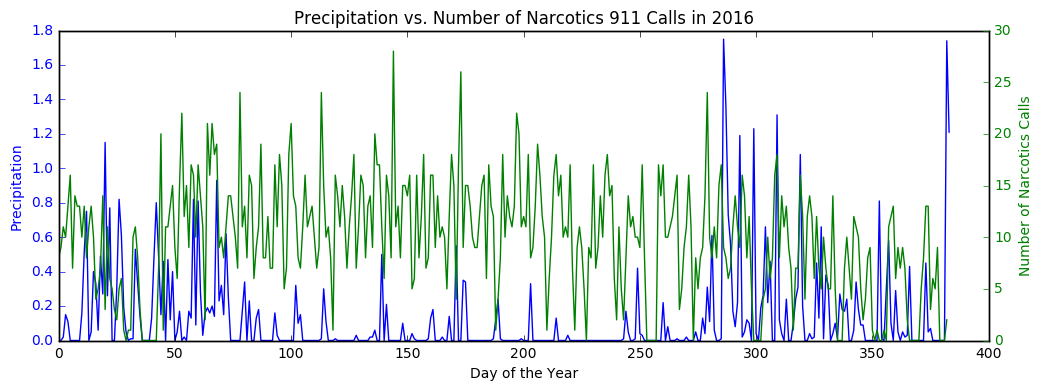

In [94]:
#fig = plt.figure(figsize = (12,4))

#plt.plot(precip, 'blue', label='Precipitation')
#plt.plot(day_data, 'green', label='Narcotics Complaints')
#plt.legend()
#plt.xlim(0, 365)
#plt.ylim(0, 35)
#plt.xlabel('Day of the Year')
#plt.ylabel('Number of Narcotics Calls')
#plt.ylabel

fig2, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(precip, 'b')
ax1.set_xlabel('Day of the Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Precipitation', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(day_data, 'g')
ax2.set_ylabel('Number of Narcotics Calls', color='g')
ax2.tick_params('y', colors='g')

plt.title('Precipitation vs. Number of Narcotics 911 Calls in 2016')
plt.show()
fig2.savefig('precipitation_narcotics_title.png')

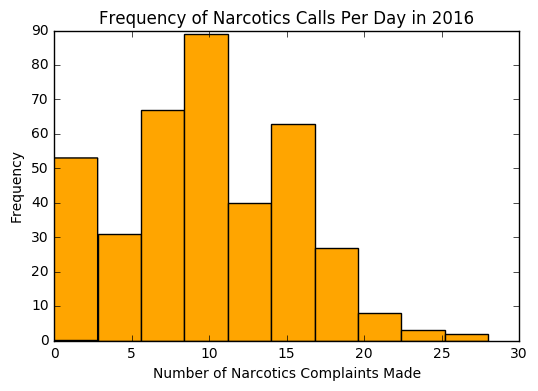

In [103]:
plt.hist(day_data, bins=10, color='orange')
plt.xlabel('Number of Narcotics Complaints Made')
plt.ylabel('Frequency')
plt.title('Frequency of Narcotics Calls Per Day in 2016')

plt.show()
#plt.savefig('freq_narcotics___.png')

## Defining functions for graphing and call type arrays

In [116]:
def call_type_freq(start_date, event_clearance_group):

    daylist = [] 
    count = 0

    for i in range(len(call_data.index)):
        if call_data.ix[i, 4] == start_date:                
            if call_data.ix[i, 2] == event_clearance_group:             
                count = count + 1            
        else:
            daylist.append(count)
            start_date = call_data.ix[i, 4]
            count = 0
    return daylist

burglary = call_type_freq('1/1/16', 'BURGLARY')

In [151]:
def plot_two_sided(weather_condition, weather_label, crime_condition, crime_label, title):

    fig, ax1 = plt.subplots(figsize=(12,4))
    ax1.plot(weather_condition, 'RoyalBlue', alpha=0.8)
    ax1.set_xlabel('Day of the Year')
    ax1.set_ylabel(weather_label, color='RoyalBlue')
    ax1.tick_params('y', colors='RoyalBlue')

    ax2 = ax1.twinx()
    ax2.plot(crime_condition, 'Maroon', alpha=0.8)
    ax2.set_ylabel(crime_label, color='Maroon')
    ax2.tick_params('y', colors='Maroon')
    
    plt.xlim(0, len(crime_condition))
    plt.title(title)
    plt.show()

#plot_two_sided(precip, 'Precipitation', burglary, 'Burglaries', 'Burglaries vs. Precipitation, 2016')

## Testing Different Call Types and Weather Patterns

In [152]:
#public_gatherings = call_type_freq('1/1/16','PUBLIC GATHERINGS')

#plot_two_sided(precip, 'Precipitation', public_gatherings, 'Public Gatherings', 
#               'Public Gatherings vs. Precipitation, 2016')

In [153]:
#plot_two_sided(temp_max, 'Maximum Temperature', public_gatherings, 'Public Gatherings', 
#               'Number of Public Gatherings and Maximum Temperature, 2016')

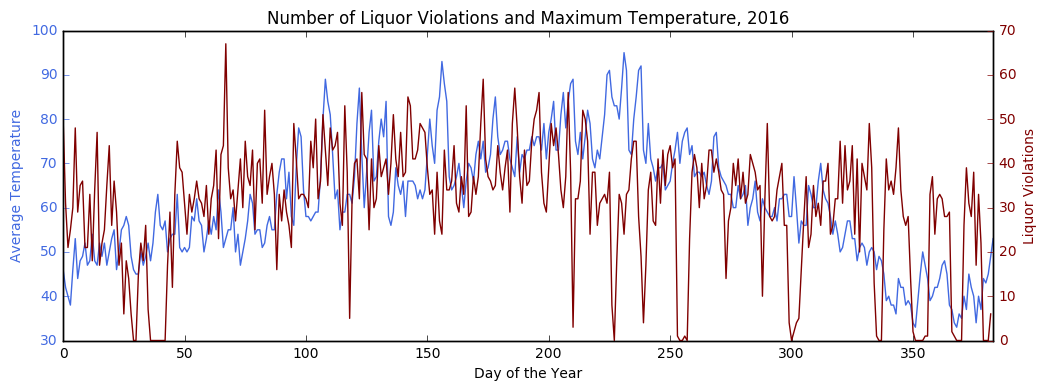

In [143]:
liquor_violations = call_type_freq('1/1/16','LIQUOR VIOLATIONS')

plot_two_sided(temp_max, 'Average Temperature', liquor_violations, 'Liquor Violations', 
               'Number of Liquor Violations and Maximum Temperature, 2016')

# All types of calls versus temperature and precipitation

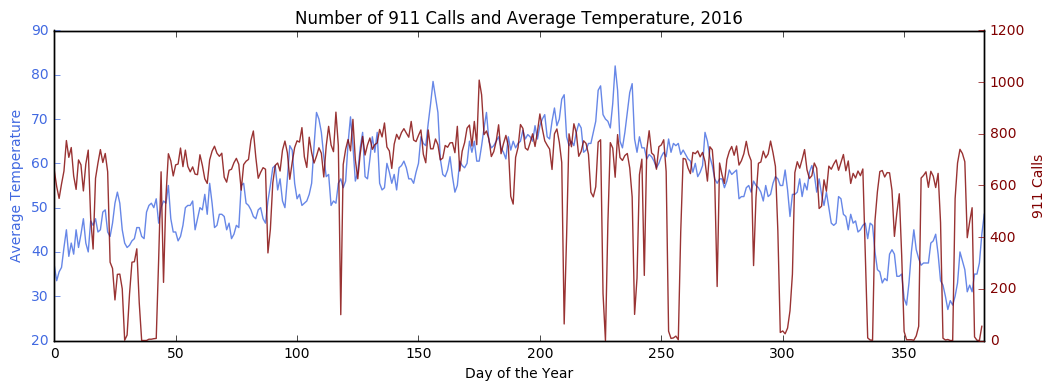

In [145]:
plot_two_sided(average_temp, 'Average Temperature', all_calls, '911 Calls', 
               'Number of 911 Calls and Average Temperature, 2016')

# Statistics

What do we want to do about the statistics issue? How do we compare two plotted lines to see how significant these results are? Have to figure out if this is important or just some coincidence

# Mapping
city of seattle, divided by census tracts if possible? 

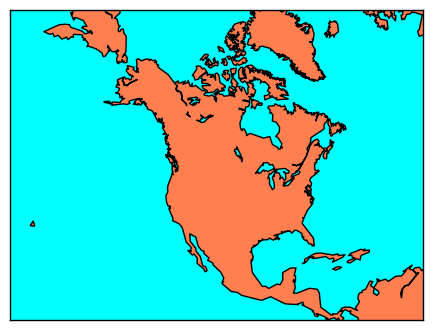

In [150]:
# just test code to get the package to work? 

from mpl_toolkits.basemap import Basemap

# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
plt.show()